# Narrative Data Summary & Exploratory Analysis

## Functions

In [4]:
# Converts all factors to character class
unfactorize <- function(df){
  for(i in which(sapply(df, class) == "factor")) df[[i]] = as.character(df[[i]])
  return(df)
}

In [5]:
# Converts character to factor class
factorize <- function(df){
  for(i in which(sapply(df, class) == "character")) df[[i]] = as.factor(df[[i]])
  return(df)
}

In [6]:
# Mode Function
mode <- function(x) {
   uniqx <- unique(x)
   uniqx[which.max(tabulate(match(x, uniqx)))]
}

## Data

In [8]:
# Load library
library(tidyverse)

sentences  <- read.csv("20210119_AM_Data4TopicModel.csv")
glimpse(sentences)

Rows: 37,608
Columns: 62
$ X                       <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14…
$ docsequence             <int> 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 2…
$ docid                   <fct> S10003-D023, S10003-D023, S10003-D023, S10003…
$ docyear                 <int> 1836, 1836, 1836, 1836, 1836, 1836, 1836, 183…
$ doctype                 <fct> Letter, Letter, Letter, Letter, Letter, Lette…
$ allsubject              <fct> "Childbirth; Church attendance; Cities; Farms…
$ broadsubj               <fct> Health; Religion; Communities; Relationships;…
$ personalevent           <fct> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ wwritten                <fct> "Baltimore, MD; Maryland; United States; Mid-…
$ docauthorid             <fct> per0022938, per0022938, per0022938, per002293…
$ docauthorname           <fct> "Bruns, Jette, 1813-1899", "Bruns, Jette, 181…
$ language                <fct> English; German, English; German, English; Ge…
$ editor                  <

In [9]:
# Get rid of first three columns (remnant index columns)
sentences <- sentences[-1]
names(sentences)

[1] "docsequence"             "docid"                  
 [3] "docyear"                 "doctype"                
 [5] "allsubject"              "broadsubj"              
 [7] "personalevent"           "wwritten"               
 [9] "docauthorid"             "docauthorname"          
[11] "language"                "editor"                 
[13] "briefname"               "nationality"            
[15] "birthyear"               "deathyear"              
[17] "birthplace"              "deathplace"             
[19] "ageatdeath"              "nativeoccupation"       
[21] "yearimmigration"         "stayednorthamerica.x"   
[23] "agewriting"              "marriagestatus"         
[25] "maternalstatus"          "authorgeneration"       
[27] "authorgender"            "culturalheritage"       
[29] "religion"                "northamericanoccupation"
[31] "religionNew"             "nationalOrigin"         
[33] "culture"                 "sinceMigration"         
[35] "authorLocation"          "A"                      
[37] "Agricultural"            "I"                      
[39] "Industrial"              "CCP"                    
[41] "Commercial"              "Professional"           
[43] "Domestic"                "Social"                 
[45] "Government"              "Other"                  
[47] "docmonth"                "docday"                 
[49] "docMonth"                "docDay"                 
[51] "docdate"                 "docDate"                
[53] "letterOrphan"            "letterLast"             
[55] "Sentence"                "Sequence"               
[57] "Sentiment"               "Sentences"              
[59] "Position"                "Last"                   
[61] "SentimentLTR"

In [10]:
# Validate Dataset
length(unique(sentences$docid))
length(unique(sentences$docauthorid))

[1] 915

[1] 218

## Subsets for Analysis

In [11]:
# Unique docs
uniqueDocs <- sentences %>% 
distinct(docid, .keep_all = T) %>%
glimpse()

Rows: 915
Columns: 61
$ docsequence             <int> 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 3…
$ docid                   <fct> S10003-D023, S10003-D024, S10003-D025, S10003…
$ docyear                 <int> 1836, 1836, 1837, 1837, 1838, 1838, 1838, 183…
$ doctype                 <fct> Letter, Letter, Letter, Letter, Letter, Lette…
$ allsubject              <fct> "Childbirth; Church attendance; Cities; Farms…
$ broadsubj               <fct> Health; Religion; Communities; Relationships;…
$ personalevent           <fct> NA, NA, NA, NA, NA, NA, NA, NA, Physical illn…
$ wwritten                <fct> "Baltimore, MD; Maryland; United States; Mid-…
$ docauthorid             <fct> per0022938, per0022938, per0022938, per002293…
$ docauthorname           <fct> "Bruns, Jette, 1813-1899", "Bruns, Jette, 181…
$ language                <fct> English; German, English; German, English; Ge…
$ editor                  <fct> "Schroeder, Adoplh E., tr.; Geisberg, Carla S…
$ briefname               <fct

In [12]:
# Unique authors
uniqueAuthors <- sentences %>% 
distinct(docauthorid, .keep_all = T) %>%
glimpse()

Rows: 218
Columns: 61
$ docsequence             <int> 23, 2, 2, 4, 5, 8, 10, 12, 14, 15, 17, 18, 20…
$ docid                   <fct> S10003-D023, S1019-D002, S11067-D002, S11067-…
$ docyear                 <int> 1836, 1872, 1906, 1906, 1906, 1906, 1906, 190…
$ doctype                 <fct> Letter, Letter, Letter, Letter, Letter, Lette…
$ allsubject              <fct> "Childbirth; Church attendance; Cities; Farms…
$ broadsubj               <fct> Health; Religion; Communities; Relationships;…
$ personalevent           <fct> NA, NA, NA, Death of spouse, NA, NA, NA, Phys…
$ wwritten                <fct> "Baltimore, MD; Maryland; United States; Mid-…
$ docauthorid             <fct> per0022938, per0001043, per0033444, per003369…
$ docauthorname           <fct> "Bruns, Jette, 1813-1899", "Segale, Sister Bl…
$ language                <fct> English; German, English, English, English, E…
$ editor                  <fct> "Schroeder, Adoplh E., tr.; Geisberg, Carla S…
$ briefname               <fct

## Words & Sentences

In [13]:
# Get library for text processing
library(tidytext)

In [14]:
# Convert Sentence from factor to character (i.e., string)
text <- as.character(sentences$Sentence)

# Put this into a tibble DF
text_df <- tibble(line = 1:37608, text = text)

# Make DF of words and sentences
wordTokens <- text_df %>%
unnest_tokens(word, text)

# View sample
sample_n(wordTokens, 10)

line,word
23893,send
4002,committed
21652,from
2330,make
19378,i
24368,i
20484,must
26246,quality
22299,is
23905,gether


In [15]:
# How many tokens
length(wordTokens$word)

# How many types
length(unique(wordTokens$word))

# Check this count against another method
sum(str_count(wordTokens$word, '\\S+'))

# Calculate the type-token ratio
length(unique(wordTokens$word)) / length(wordTokens$word)

[1] 755269

[1] 25067

[1] 755269

[1] 0.0331895

In [16]:
# Word frequencies
wordTokens %>%
count(word, sort = TRUE)

word,n
the,39899
and,24421
to,23742
of,20145
i,17478
a,16436
in,13430
is,9790
that,7893
for,7754


In [17]:
#Get stopwords from NLTK topic model notebook
stopwords  <- c('i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't")

# Add a column to indicate the lexicon
stopwords  <- cbind(stopwords, "nltk")

#Change col names to match stop_words DF in tidytext package
colnames(stopwords) <- c("word", "lexicon") 

# Join the two DFs
stop_words <- rbind(stop_words, stopwords)

# View nltk stopwords
stop_words %>%
filter(lexicon == "nltk") %>% 
pull(word)%>% 
print()

  [1] "i"          "me"         "my"         "myself"     "we"        
  [6] "our"        "ours"       "ourselves"  "you"        "you're"    
 [11] "you've"     "you'll"     "you'd"      "your"       "yours"     
 [16] "yourself"   "yourselves" "he"         "him"        "his"       
 [21] "himself"    "she"        "she's"      "her"        "hers"      
 [26] "herself"    "it"         "it's"       "its"        "itself"    
 [31] "they"       "them"       "their"      "theirs"     "themselves"
 [36] "what"       "which"      "who"        "whom"       "this"      
 [41] "that"       "that'll"    "these"      "those"      "am"        
 [46] "is"         "are"        "was"        "were"       "be"        
 [51] "been"       "being"      "have"       "has"        "had"       
 [56] "having"     "do"         "does"       "did"        "doing"     
 [61] "a"          "an"         "the"        "and"        "but"       
 [66] "if"         "or"         "because"    "as"         "until"     
 [71] 

In [18]:
# Place the 19th century literature stopwords compiled by Jockers into a list
jockersStop <- read.csv("jockers.csv")

# Add a column to indicate the lexicon
jockersStop  <- cbind(jockersStop, "jockers")

#Change col names to match stop_words DF in tidytext package
colnames(jockersStop) <- c("word", "lexicon") 

# Join the DF to stop_words
stop_words <- rbind(stop_words, jockersStop)

# View 19th Century stopwords
stop_words %>%
filter(lexicon == "jockers") %>% 
pull(word)%>% 
print()

   [1] "0"            "1"            "2"            "3"           
   [5] "4"            "5"            "6"            "7"           
   [9] "8"            "9"            "a"            "aaron"       
  [13] "abbey"        "abbie"        "abdul"        "abe"         
  [17] "across"       "abel"         "abigail"      "about"       
  [21] "above"        "abraham"      "abram"        "abst"        
  [25] "accordance"   "according"    "act"          "actually"    
  [29] "ada"          "adah"         "adalberto"    "adaline"     
  [33] "adam"         "adan"         "added"        "among"       
  [37] "addie"        "adela"        "adelaida"     "adelaide"    
  [41] "adele"        "adelia"       "adelina"      "adeline"     
  [45] "adell"        "adella"       "adelle"       "adena"       
  [49] "adina"        "adj"          "adolfo"       "adolph"      
  [53] "adopted"      "adria"        "adrian"       "adriana"     
  [57] "adriane"      "adrianna"     "adrien"       "adrienne"

In [19]:
# How many stopwords?
stop_words %>%
filter(lexicon == "jockers") %>% 
pull(word)%>% 
length()

[1] 5631

In [20]:
# Word Tokens Minus Stopwords
tokensStopless <- wordTokens %>%
anti_join(filter(stop_words, lexicon == "jockers"), by = "word") 
tokensStopless

line,word
1,baltimore
1,20
1,1836
1,dear
1,heinrich
1,friday
1,evening
1,16
1,anchor
1,dropped


In [21]:
# How many word tokens
length(tokensStopless$word)

# How many types
length(unique(tokensStopless$word))

# Cross check
sum(str_count(tokensStopless$word, '\\S+'))

# Calculate the type-token ratio
length(unique(tokensStopless$word)) / length(tokensStopless$word)

[1] 270422

[1] 23849

[1] 270422

[1] 0.08819179

In [22]:
# Word frequencies
tokensStopless %>%
count(word, sort = TRUE)

word,n
time,1648
dear,1482
little,1326
day,1230
letter,1079
work,1041
sister,986
people,908
house,881
country,855


In [23]:
# Create table for visualization
tableStopless <- tokensStopless %>%
  count(word, sort = TRUE)

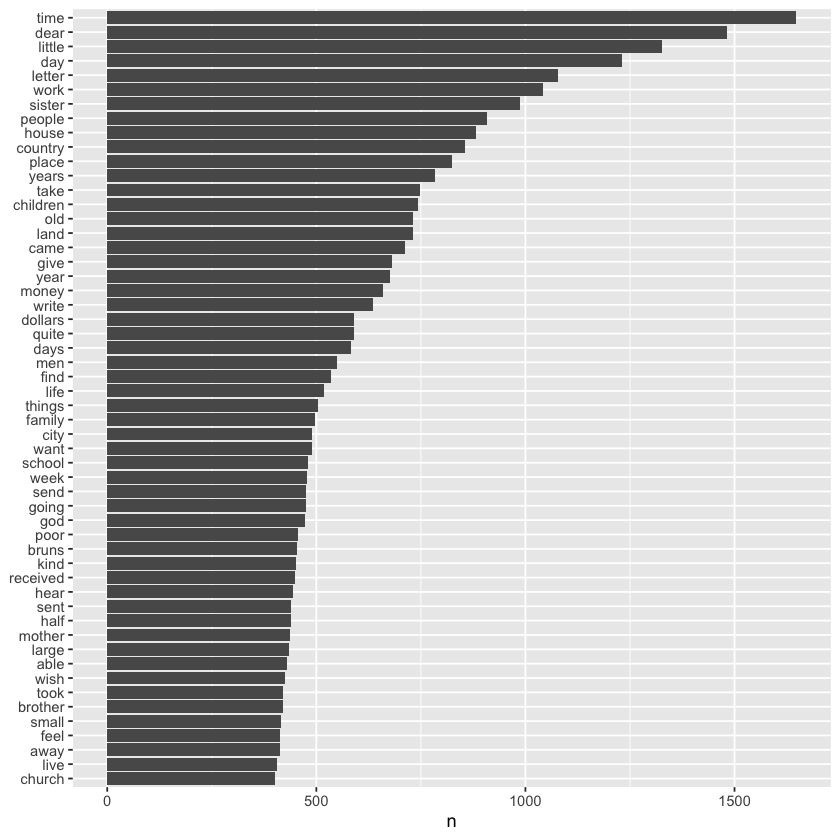

In [24]:
# Plot highest frequency words
main  <- tableStopless %>%
  filter(n > 400) %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(n, word)) +
  geom_col() +
  labs(y = NULL)
main

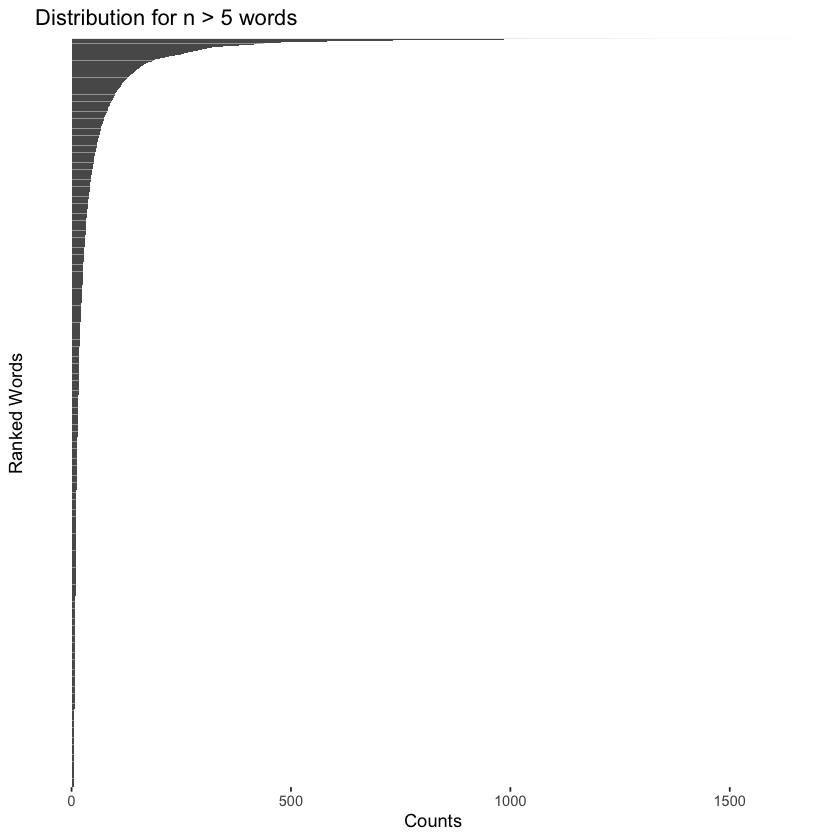

In [25]:
# Plot all words
inset <- ggplot(filter(tableStopless, n > 5), aes(x = n, y = reorder(word, n))) +
         geom_bar(stat = "identity") +                                                           # Remove axis labels & ticks
  theme(axis.text.y = element_blank(),
        axis.ticks.y = element_blank()) +
labs(x = "Counts", y = "Ranked Words", title = "Distribution for n > 5 words") 
inset

In [26]:
library(cowplot)

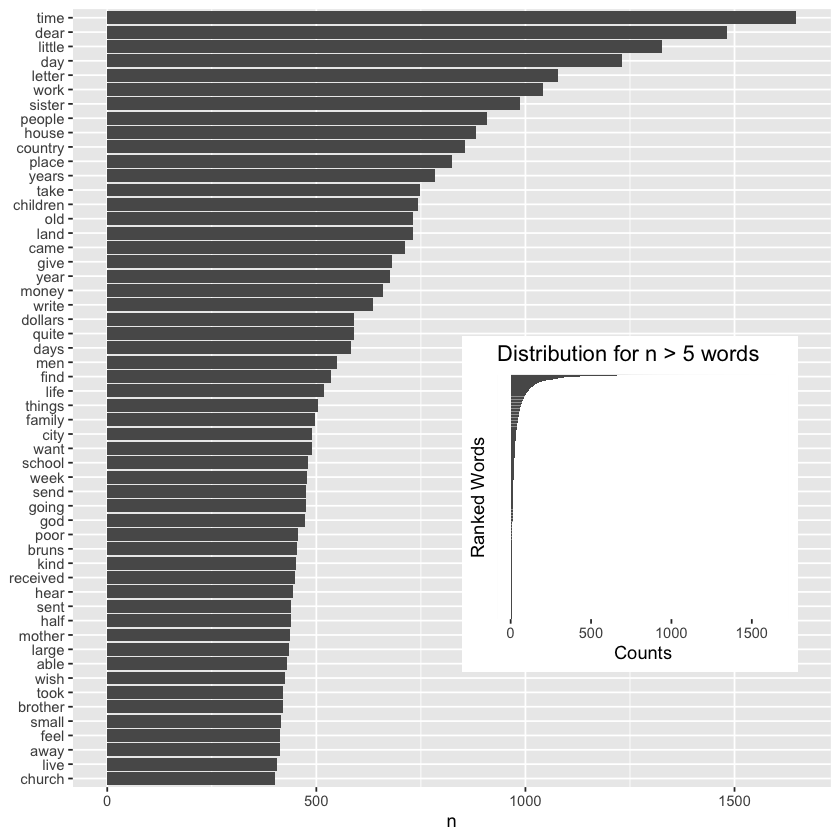

In [27]:
plot.with.inset <-
  ggdraw() +
  draw_plot(main) +
  draw_plot(inset, x = 0.55, y = .2, width = .4, height = .4)
plot.with.inset

In [47]:
ggsave("20210110_AM_WordFreq.png")

Saving 7 x 7 in image



In [28]:
summary(tableStopless)

     word                 n          
 Length:23849       Min.   :   1.00  
 Class :character   1st Qu.:   1.00  
 Mode  :character   Median :   2.00  
                    Mean   :  11.34  
                    3rd Qu.:   6.00  
                    Max.   :1648.00  

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0    13.5    28.0    41.1    51.0   693.0 

[1] 11

[1] 48.27084

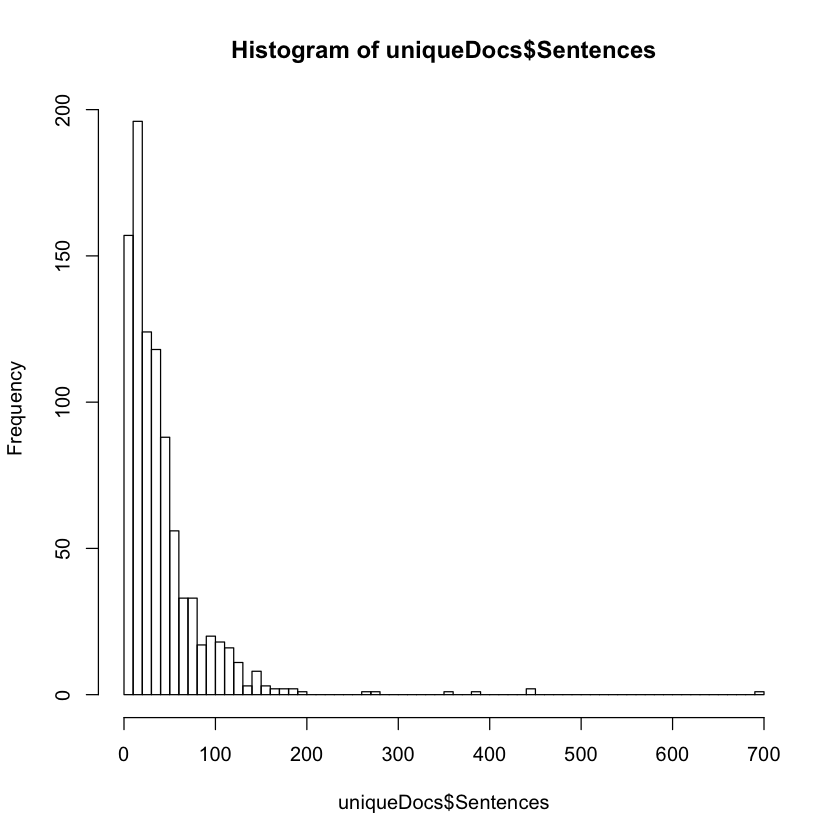

In [29]:
# Summarize the data for number of sentences per letter.
hist(uniqueDocs$Sentences, breaks = 50)
summary(uniqueDocs$Sentences)
mode(uniqueDocs$Sentences)
sd(uniqueDocs$Sentences)

In [50]:
# What are the outliers?
subset(uniqueDocs, Sentences > 200, select = c(docid, docauthorid, docauthorname, Sentences))

,docid,docauthorid,docauthorname,Sentences
147,S1019-D013,per0001043,"Segale, Sister Blandina, 1850-1941",275
555,S8552-D007,per0014260,"Lecouvreur, Frank, 1829-1901",385
556,S8552-D008,per0014260,"Lecouvreur, Frank, 1829-1901",693
557,S8552-D009,per0014260,"Lecouvreur, Frank, 1829-1901",266
817,S9912-D002,per0034430,"Mooney, Thomas, fl. 1850",357
818,S9912-D003,per0034430,"Mooney, Thomas, fl. 1850",450
819,S9912-D004,per0034430,"Mooney, Thomas, fl. 1850",443


Examining the text files showed that they contain multiple letters (e.g.,, Lecouvreur) or just very long letters, written almost as a personalized memoir (e.g., Segale) or report (e.g., Mooney). This begged the question of other "letters" being multiples grouped together inside a single file. This will be treated as measurement error

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   13.00   28.00   38.26   50.00  194.00 

[1] 33.9484

[1] 908

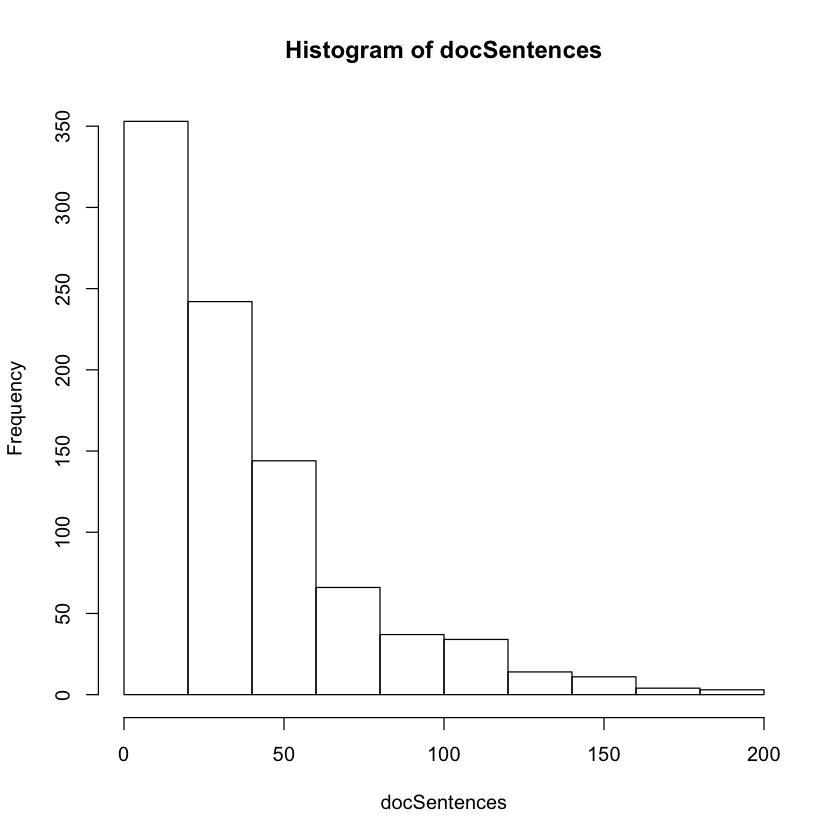

In [70]:
# How does summary data change the summary data if we remove the outliers?
docSentences <- uniqueDocs %>%
filter(Sentences < 266) %>%
pull(Sentences)

summary(docSentences)
sd(docSentences)
length(docSentences)
hist(docSentences)

## Location of Sentence

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.001443 0.262136 0.510870 0.512165 0.761905 1.000000 

[1] 0.2888475

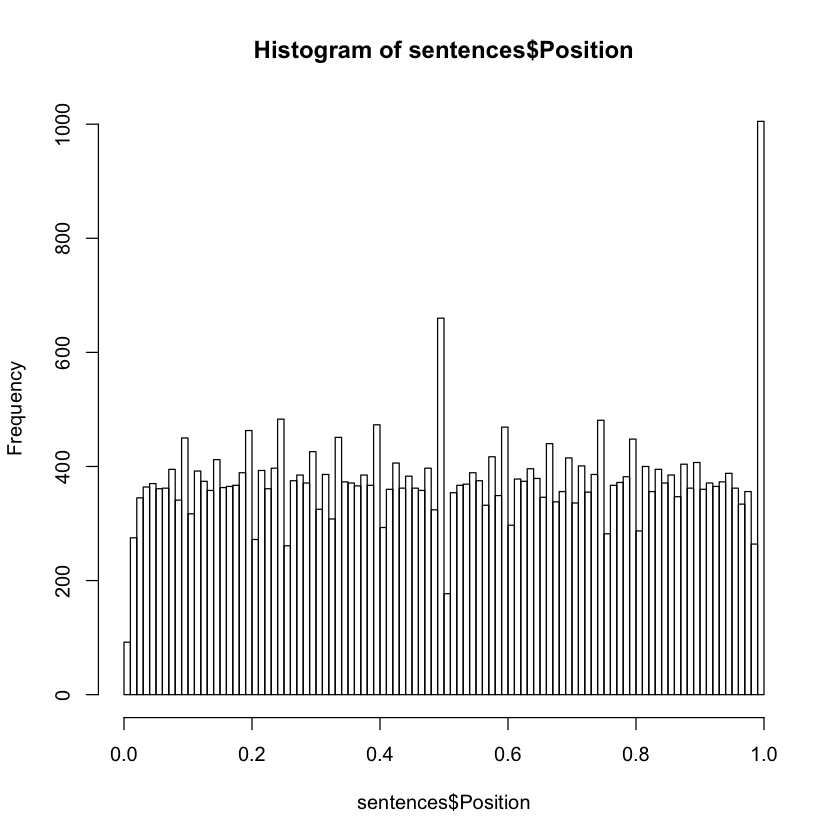

In [52]:
# Summarize the data for sentence position
hist(sentences$Position, breaks = 100)
summary(sentences$Position)
sd(sentences$Position)

In [51]:
#Get Summary
sentences %>%
filter(Sentences < 266) %>%
select(Position) %>%
summary()

    Position       
 Min.   :0.005155  
 1st Qu.:0.263158  
 Median :0.512195  
 Mean   :0.513069  
 3rd Qu.:0.762606  
 Max.   :1.000000  

   Sentences     
 Min.   :  1.00  
 1st Qu.: 13.00  
 Median : 28.00  
 Mean   : 38.26  
 3rd Qu.: 50.00  
 Max.   :194.00  